# TASK 6 "Prediction using Decision Tree Algorithm"

# Author: Laiba Memon

# Data Science & Business Analytics

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING THE DATASET

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Drop the ID column

In [4]:
df.drop('Id',axis=1,inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# DATA VISUALIZATION

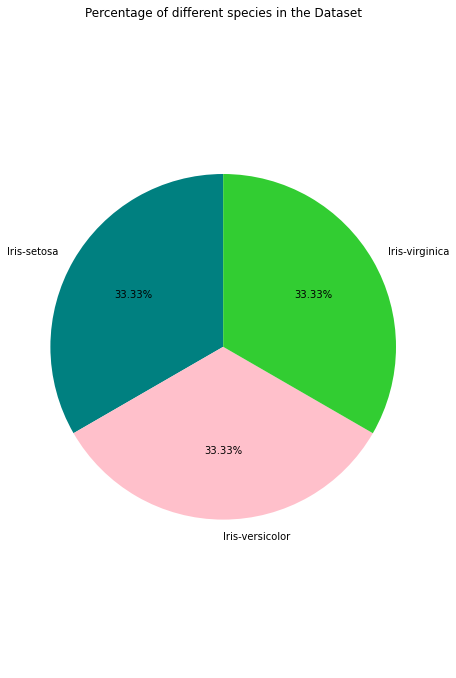

In [17]:
fig = plt.figure(figsize=(6, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['teal','Pink','limegreen']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

Text(0.5, 1.0, 'Species vs Sepal Length')

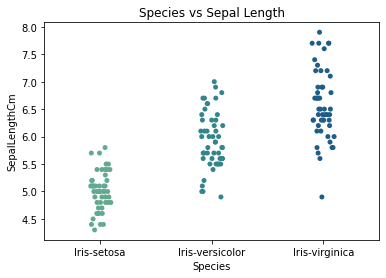

In [20]:
sns.stripplot(x='Species', y='SepalLengthCm', data=df, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

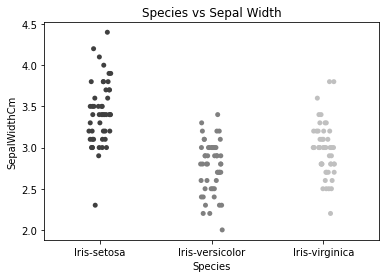

In [40]:
sns.stripplot(x='Species', y='SepalWidthCm', data=df, palette='gray')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

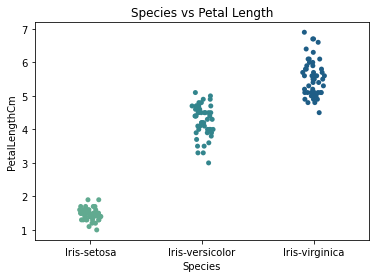

In [30]:
sns.stripplot(x='Species', y='PetalLengthCm', data=df, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

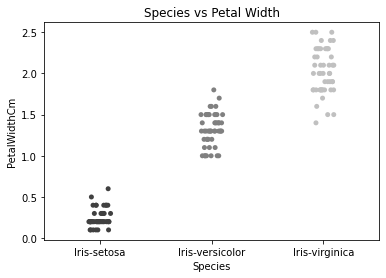

In [39]:
sns.stripplot(x='Species', y='PetalWidthCm', data=df, palette='gray')
plt.title('Species vs Petal Width')

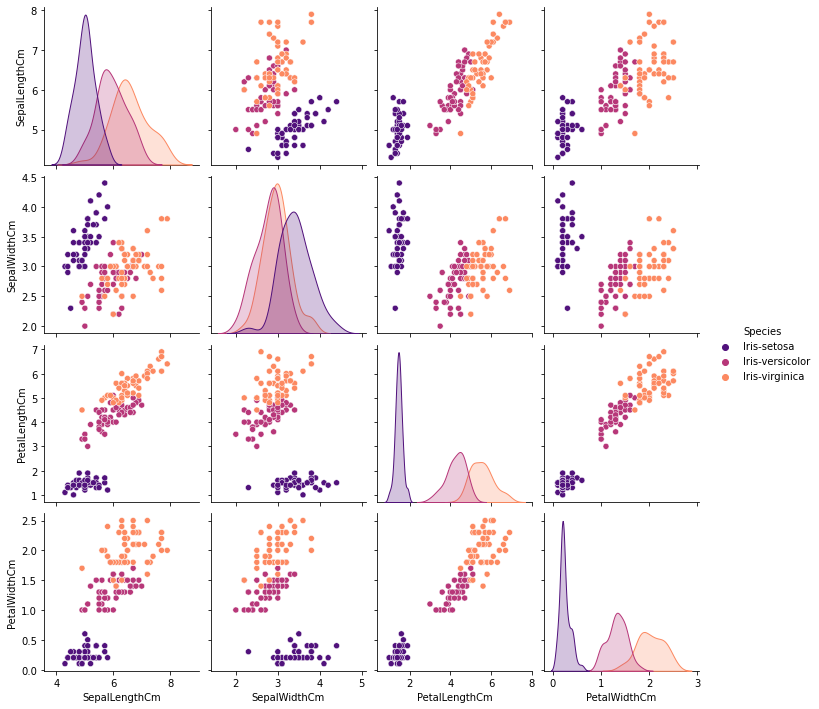

In [41]:
sns.pairplot(df, hue='Species', palette='magma')
plt.show()


<AxesSubplot:>

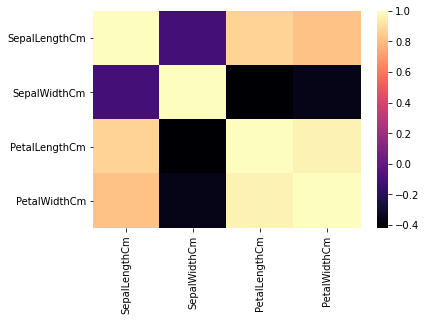

In [42]:
data = df.corr()
sns.heatmap(data,cmap = 'magma')

# SPLITITNG THE DATASET

In [43]:
X = df.drop(['Species'], axis=1)
Y = df['Species']

# TRAIN AND TEST THE DATA

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# DECISION TREE CREATION

In [46]:
from sklearn.tree import DecisionTreeClassifier
dta = DecisionTreeClassifier(criterion="entropy", random_state=20)

In [47]:
dta.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [48]:
Y_pred = dta.predict(X_test)

In [50]:
dfa = df.copy()
dfa = pd.DataFrame({'Real': Y_test, 'Predicted': Y_pred})
dfa.reset_index(inplace = True, drop = True)
dfa.sample(10)

,Real,Predicted
8,Iris-versicolor,Iris-versicolor
12,Iris-versicolor,Iris-versicolor
0,Iris-virginica,Iris-virginica
40,Iris-virginica,Iris-virginica
32,Iris-setosa,Iris-setosa
21,Iris-versicolor,Iris-versicolor
30,Iris-virginica,Iris-virginica
15,Iris-setosa,Iris-setosa
28,Iris-versicolor,Iris-versicolor
42,Iris-virginica,Iris-virginica


In [51]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy : {}'.format(accuracy))
print('Recall :{}'.format(metrics.recall_score(Y_test, Y_pred, average='macro')))
print('Precision :{}'.format(metrics.precision_score(Y_test, Y_pred, average='macro')))

Accuracy : 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222


In [52]:
print(metrics.classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [53]:
print('Confusion Matrix')
print(metrics.confusion_matrix(Y_test, Y_pred))

Confusion Matrix
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


AxesSubplot(0.125,0.125;0.62x0.755)


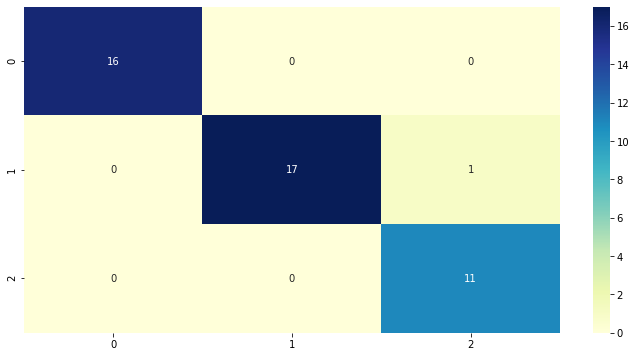

In [59]:
plt.figure(figsize=(12, 6))
print(sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'YlGnBu'))

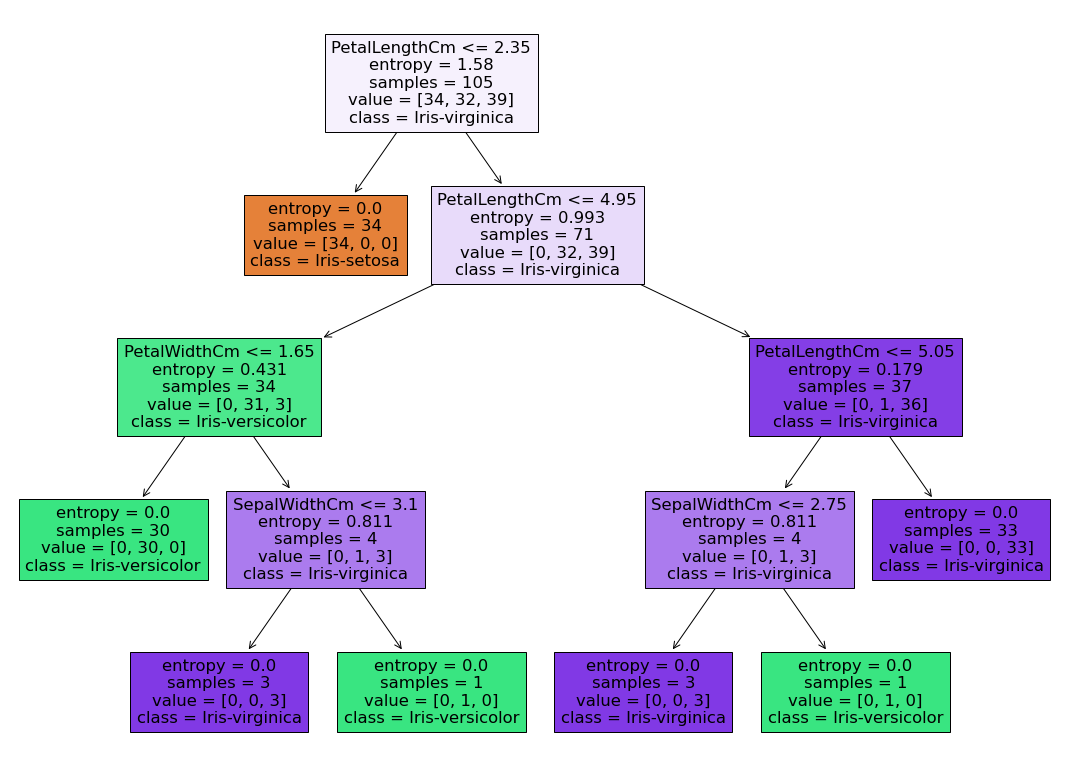

In [61]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dta, feature_names=features, class_names=classes, filled=True)
plt.show()

# CONCLUSION


In [ ]:
The Accuracy test Score is about 0.97% for the Decision tree.